In [2]:
library(ggplot2)
library(reshape2)
library(dplyr)
library(ggpubr)
library('ggplot2')
library('reshape2')
library('ggpubr')
library(glmnet)
library(doMC)
library(survival)
library(data.table)
library(mltools)
library(CoxBoost)
library(randomForestSRC)
library(CoxHD)
library(Hmisc)
library(gridExtra)
library("survminer")
library(dplyr)
library(stringr)
source("../../../src/tools.R")
options(repr.plot.res        = 100, # set a medium-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 250, # set the maximum number of rows displayed
        repr.matrix.max.cols = 250)

# Added Value when we add components knowledge to chromatin splicing factors

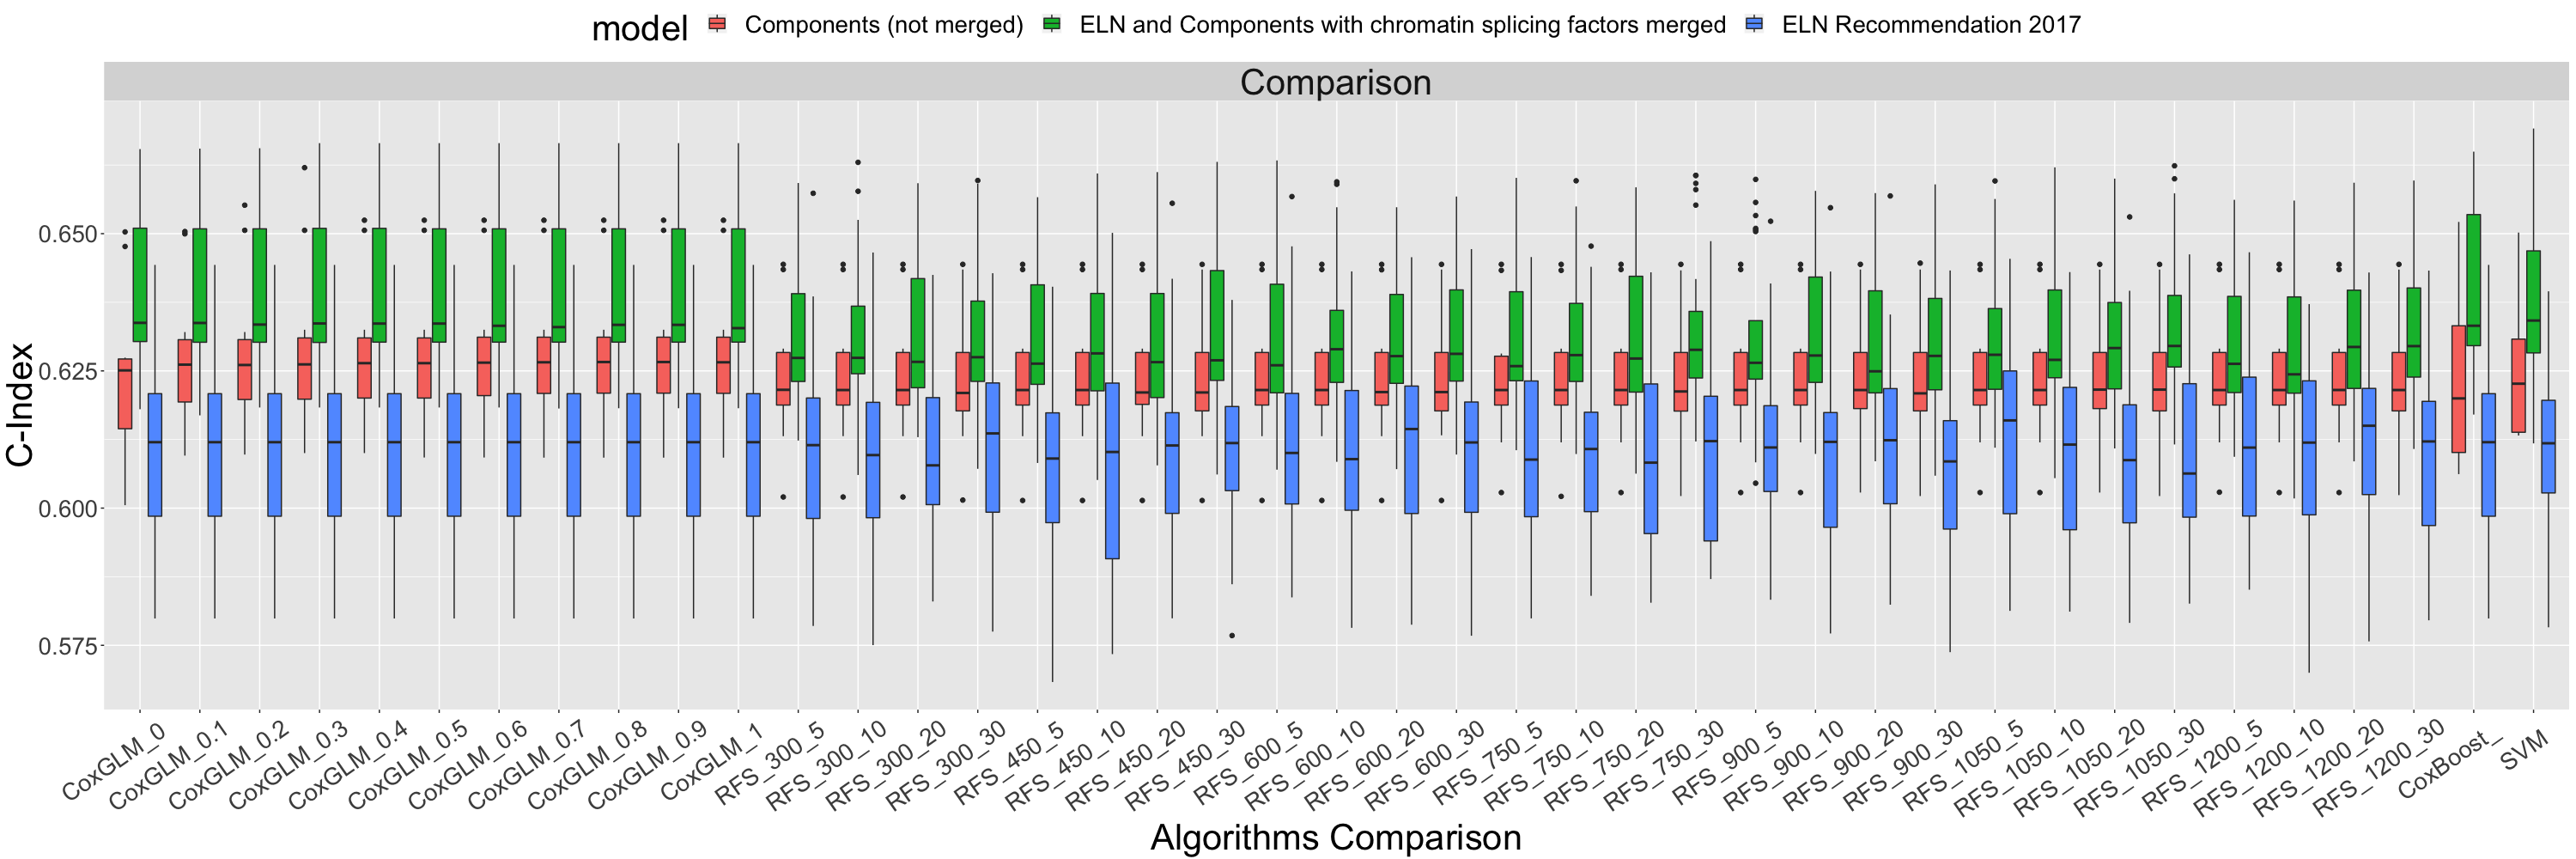

In [82]:
SVM <- read.table("SVM_add_eln_comp.csv",sep=",",header=T)
SVM_final <- read.table("../InitialPrognosis/final_prognosis/SVM_comp.csv",sep=",",header=T)
eln <- cbind(read.table("../InitialPrognosis/final_prognosis/eln.tsv"),SVM=SVM$eln)
eln$RFX_ <- NULL
eln$model <- "ELN Recommendation 2017"
comp <- cbind(read.table("../InitialPrognosis/final_prognosis/comp.tsv"),SVM=SVM_final$comp)
comp$RFX_ <- NULL
comp$model <- "Components (not merged)"
df_comparison <- rbind(eln,comp)
eln_comp <- cbind(read.table("eln_comp_merged.tsv"),SVM=SVM$eln_comp_chr_merged)
eln_comp$RFX_ <- NULL
eln_comp$model <- "ELN and Components with chromatin splicing factors merged"
df_comparison <- rbind(df_comparison,eln_comp)
#df_comparison <- rbind(df_comparison,df2)
#df_comparison <- rbind(df_comparison,df3)
#df_comparison <- melt(df_comparison,id='model')
#df_comparison $title <- "Comparison"
df_comparison <- melt(df_comparison,id='model')
df_comparison $title <- "Comparison"
set_notebook_plot_size(30,10)
ggplot(df_comparison,aes(x=variable,y=value)) + geom_boxplot(aes(fill = model), notch=F)+
theme(strip.text = element_text(size=30),legend.position="top",axis.text.x = element_text(angle = 35, hjust = 0.8,vjust=0.8,size=20),axis.text.y = element_text(size = 20),
     axis.title.x=element_text(size=30),axis.title.y=element_text(size=30),legend.title=element_text(size=30),legend.text=element_text(size=20)) +
ylab("C-Index") + xlab("Algorithms Comparison") + facet_wrap( ~ title) #+ stat_compare_means(paired = T)

# Clinical Comparison

[1] 0.6621488

[1] 0.6574047

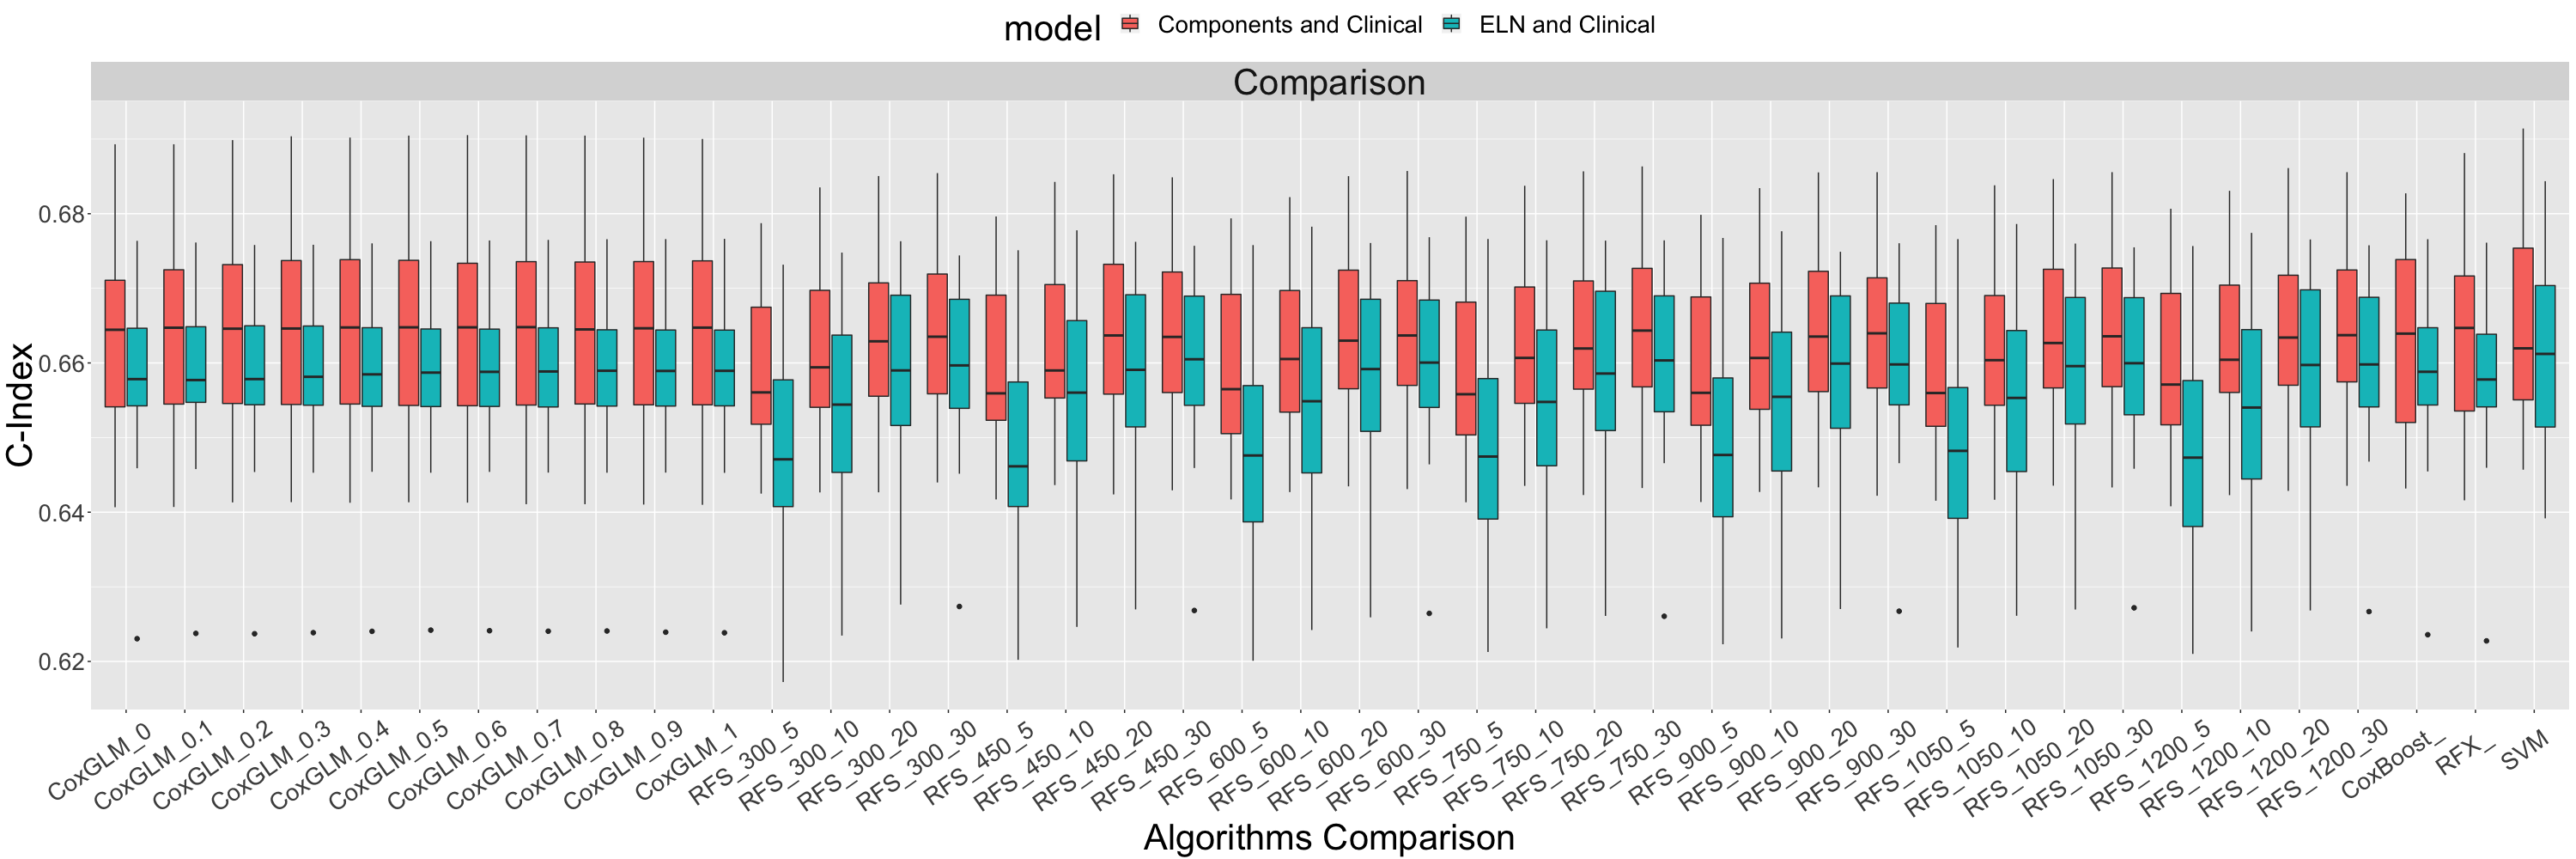

In [46]:
clin_comp <- cbind(read.table("../InitialPrognosis/final_prognosis/clin_comp.tsv"),SVM=SVM_final$clin_comp)
clin_comp$model <- "Components and Clinical"
clin_eln <- cbind(read.table("../InitialPrognosis/final_prognosis/eln_clin.tsv"),SVM=SVM_final$eln_clin)
clin_eln$model <- "ELN and Clinical"
df_comparison <- rbind(clin_comp,clin_eln)
df_comparison <- melt(df_comparison,id='model')
df_comparison $title <- "Comparison"
median(as.matrix(clin_comp[,-length(colnames(clin_eln))]))
median(as.matrix(clin_eln[,-length(colnames(clin_comp))]))
set_notebook_plot_size(30,10)
ggplot(df_comparison,aes(x=variable,y=value)) + geom_boxplot(aes(fill = model), notch=F)+
theme(strip.text = element_text(size=30),legend.position="top",axis.text.x = element_text(angle = 35, hjust = 0.8,vjust=0.8,size=20),axis.text.y = element_text(size = 20),
     axis.title.x=element_text(size=30),axis.title.y=element_text(size=30),legend.title=element_text(size=30),legend.text=element_text(size=20)) +
ylab("C-Index") + xlab("Algorithms Comparison") + facet_wrap( ~ title) #+ stat_compare_means(paired = T)

# Genetical Comparison

[1] 0.6416661

[1] 0.6519107

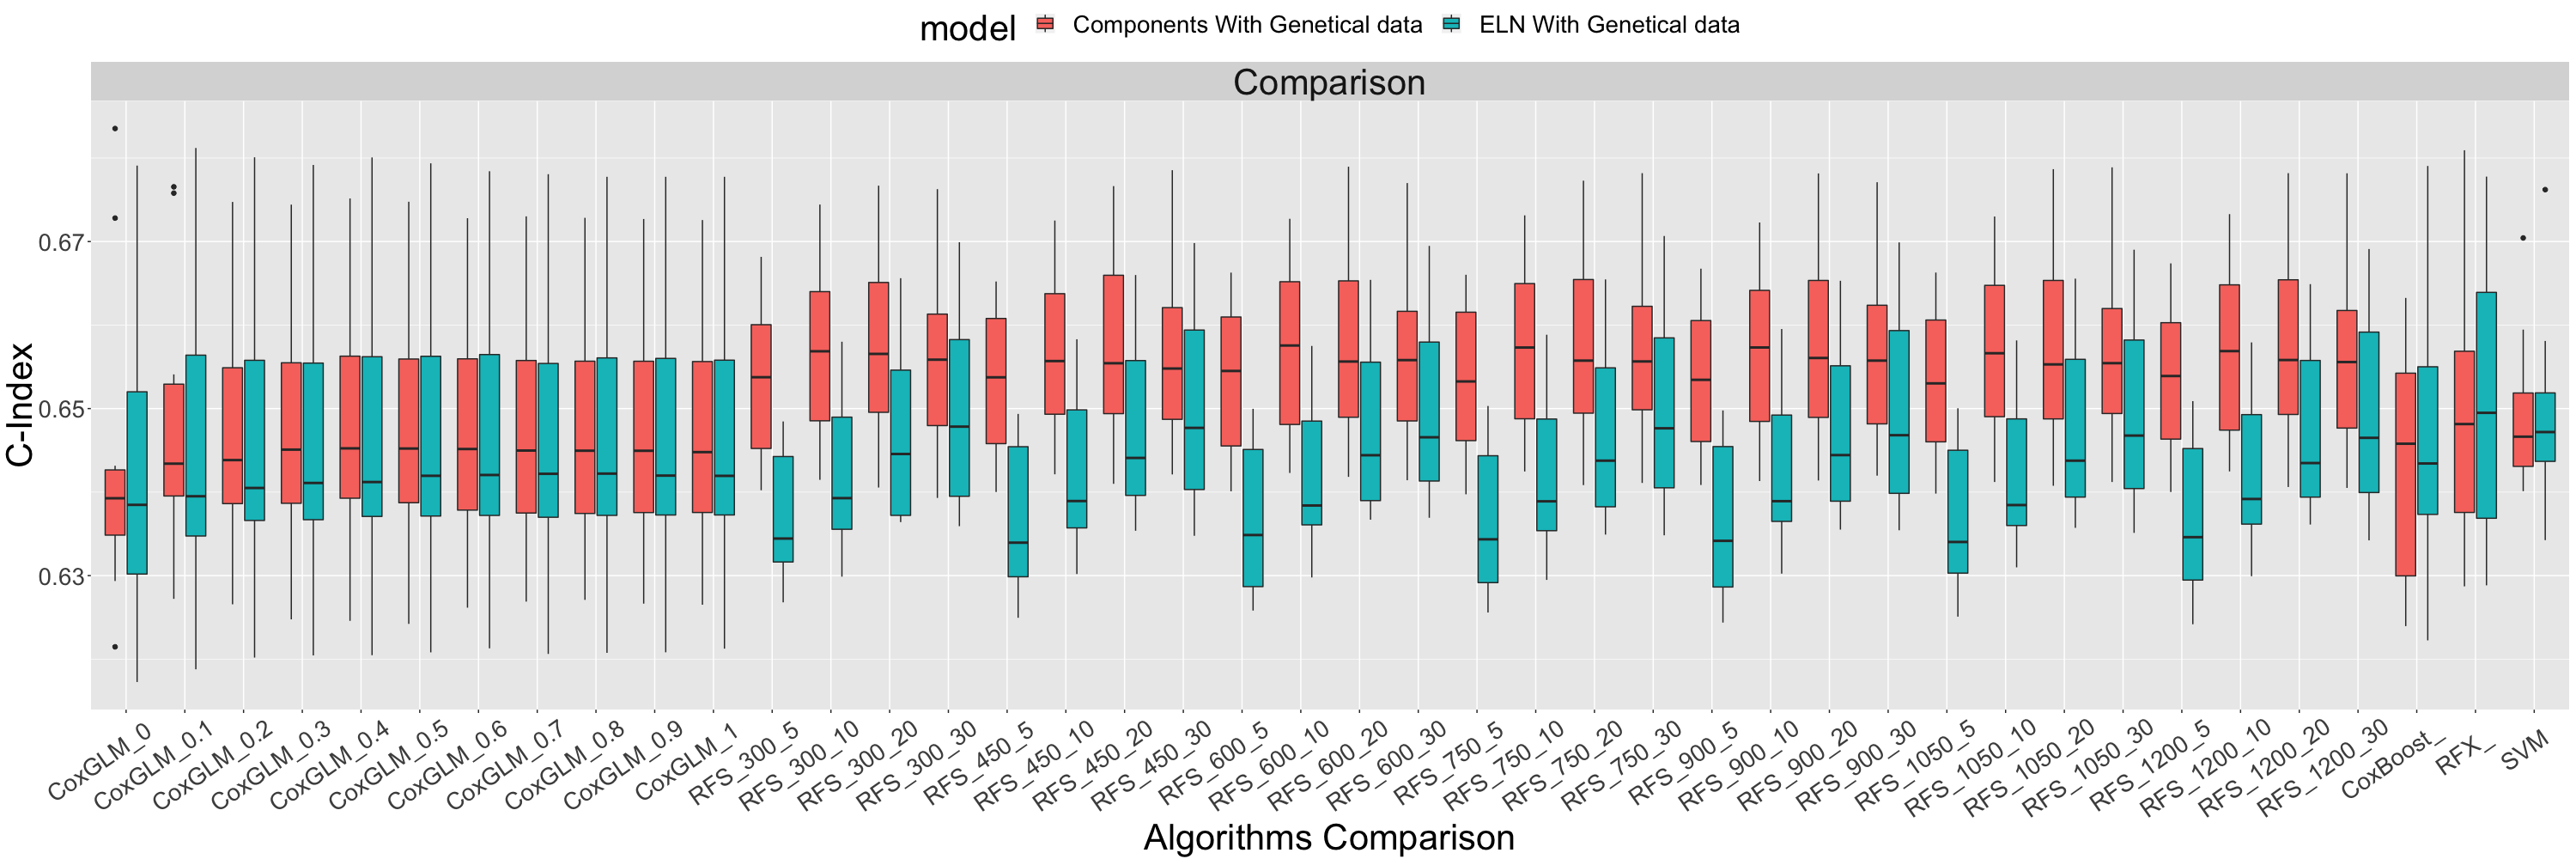

In [43]:
gen_comp <- cbind(read.table("../InitialPrognosis/final_prognosis/gen_comp.tsv"),SVM=SVM_final$gen_comp)
gen_comp $model <- "Components With Genetical data"
gen_eln <- cbind(read.table("../InitialPrognosis/final_prognosis/eln_gen.tsv")[1:10,],SVM=SVM$eln_gen[1:10])
gen_eln$model <- "ELN With Genetical data"
df_comparison <- rbind(gen_comp,gen_eln)
df_comparison <- melt(df_comparison,id='model')
df_comparison $title <- "Comparison"
set_notebook_plot_size(30,10)
median(as.matrix(gen_eln[,-length(colnames(gen_eln))]))
median(as.matrix(gen_comp[,-length(colnames(gen_comp))]))
ggplot(df_comparison,aes(x=variable,y=value)) + geom_boxplot(aes(fill = model), notch=F)+
theme(strip.text = element_text(size=30),legend.position="top",axis.text.x = element_text(angle = 35, hjust = 0.8,vjust=0.8,size=20),axis.text.y = element_text(size = 20),
     axis.title.x=element_text(size=30),axis.title.y=element_text(size=30),legend.title=element_text(size=30),legend.text=element_text(size=20)) +
ylab("C-Index") + xlab("Algorithms Comparison") + facet_wrap( ~ title) #+ stat_compare_means(paired = T)

# Cytogenetical Comparison

[1] 0.6294417

[1] 0.6282719

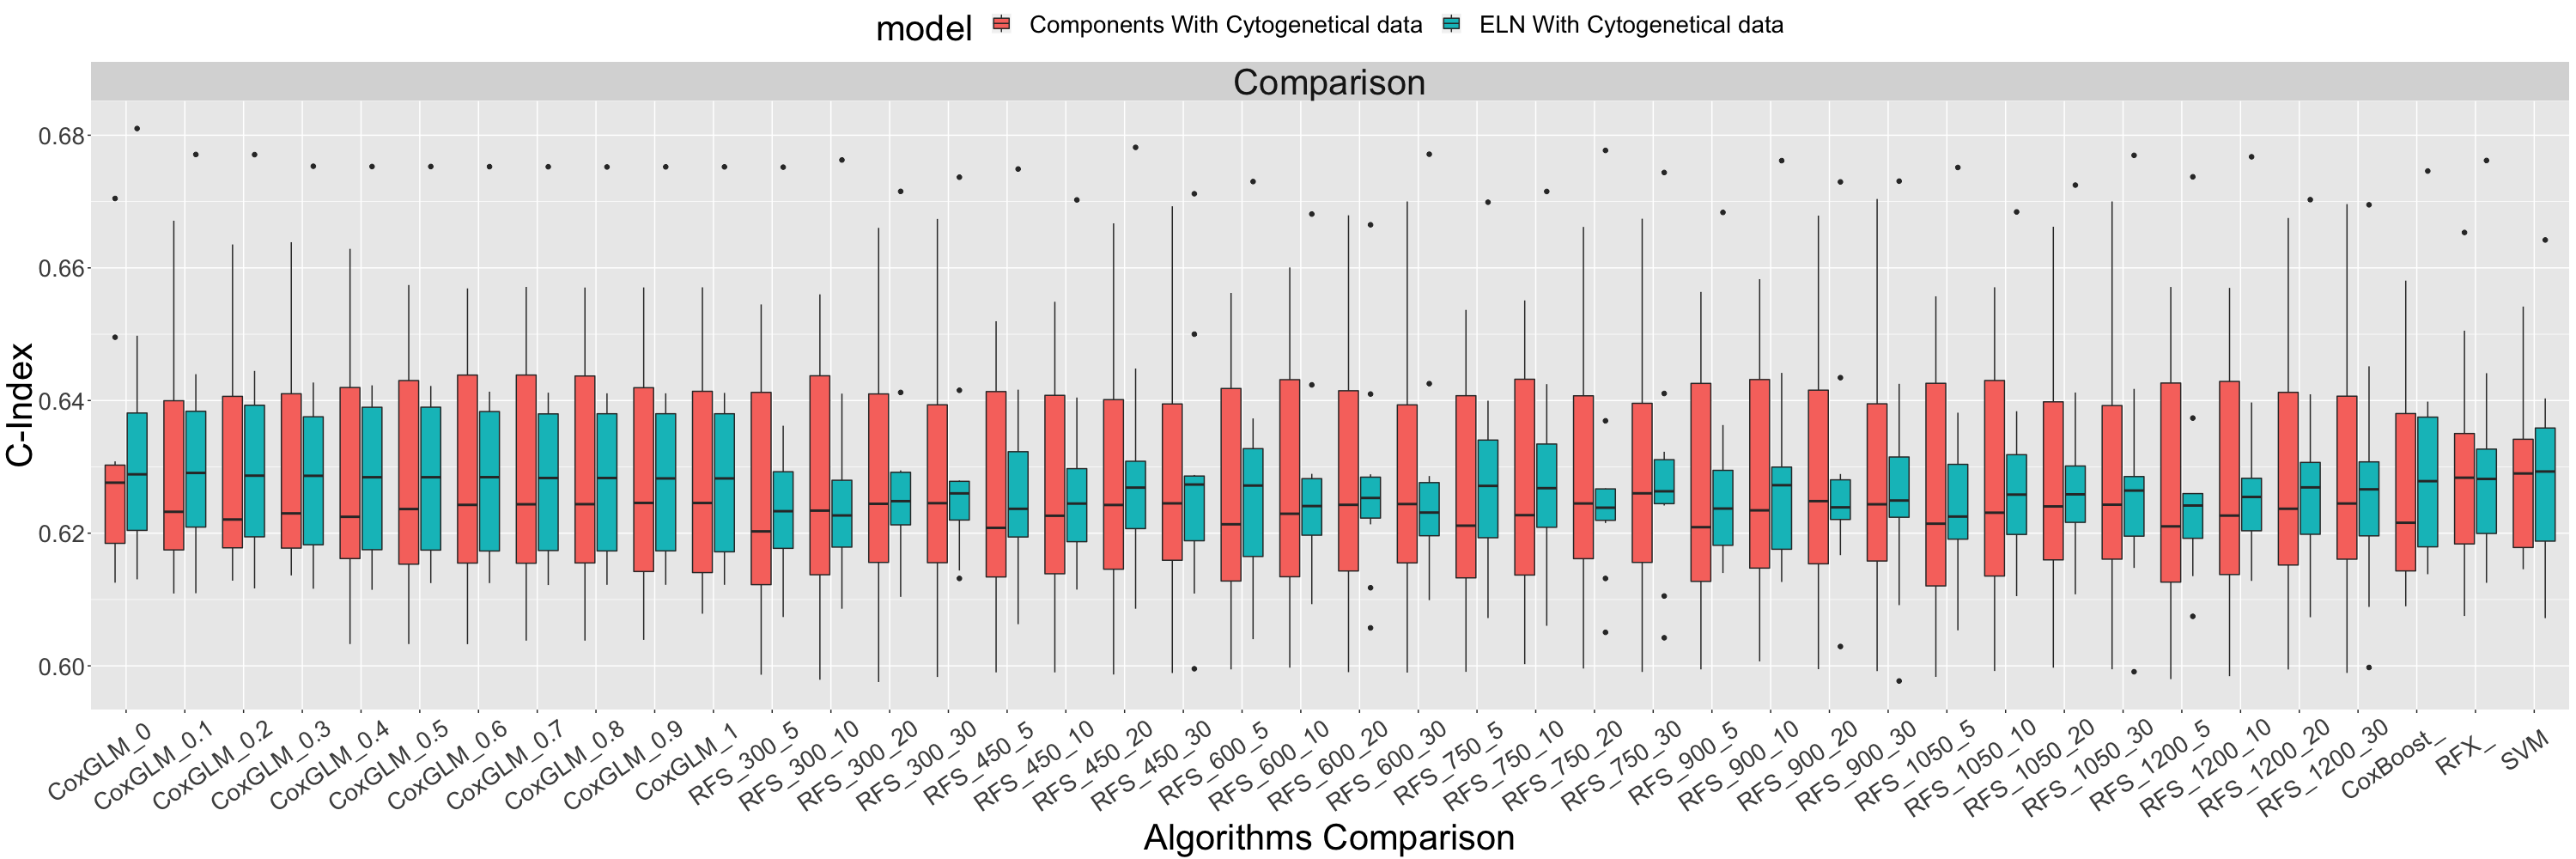

In [72]:
cyto_comp <- cbind(read.table("../InitialPrognosis/final_prognosis/cyto_comp.tsv"),SVM=SVM_final$cyto_comp)
cyto_comp $model <- "Components With Cytogenetical data"
cyto_eln <- cbind(read.table("../InitialPrognosis/final_prognosis/eln_cyto.tsv")[1:10,],SVM=SVM$eln_cyto[1:10])
cyto_eln$model <- "ELN With Cytogenetical data"
df_comparison <- rbind(cyto_comp,cyto_eln)
df_comparison <- melt(df_comparison,id='model')
df_comparison $title <- "Comparison"
set_notebook_plot_size(30,10)
mean(as.matrix(cyto_eln[,-length(colnames(cyto_eln))]))
mean(as.matrix(cyto_comp[,-length(colnames(cyto_comp))]))
ggplot(df_comparison,aes(x=variable,y=value)) + geom_boxplot(aes(fill = model), notch=F)+
theme(strip.text = element_text(size=30),legend.position="top",axis.text.x = element_text(angle = 35, hjust = 0.8,vjust=0.8,size=20),axis.text.y = element_text(size = 20),
     axis.title.x=element_text(size=30),axis.title.y=element_text(size=30),legend.title=element_text(size=30),legend.text=element_text(size=20)) +
ylab("C-Index") + xlab("Algorithms Comparison") + facet_wrap( ~ title) #+ stat_compare_means(paired = T)

# More insights with cytogenetical data

[1] 0.6282264

[1] 0.6248873

[1] 0.6101422

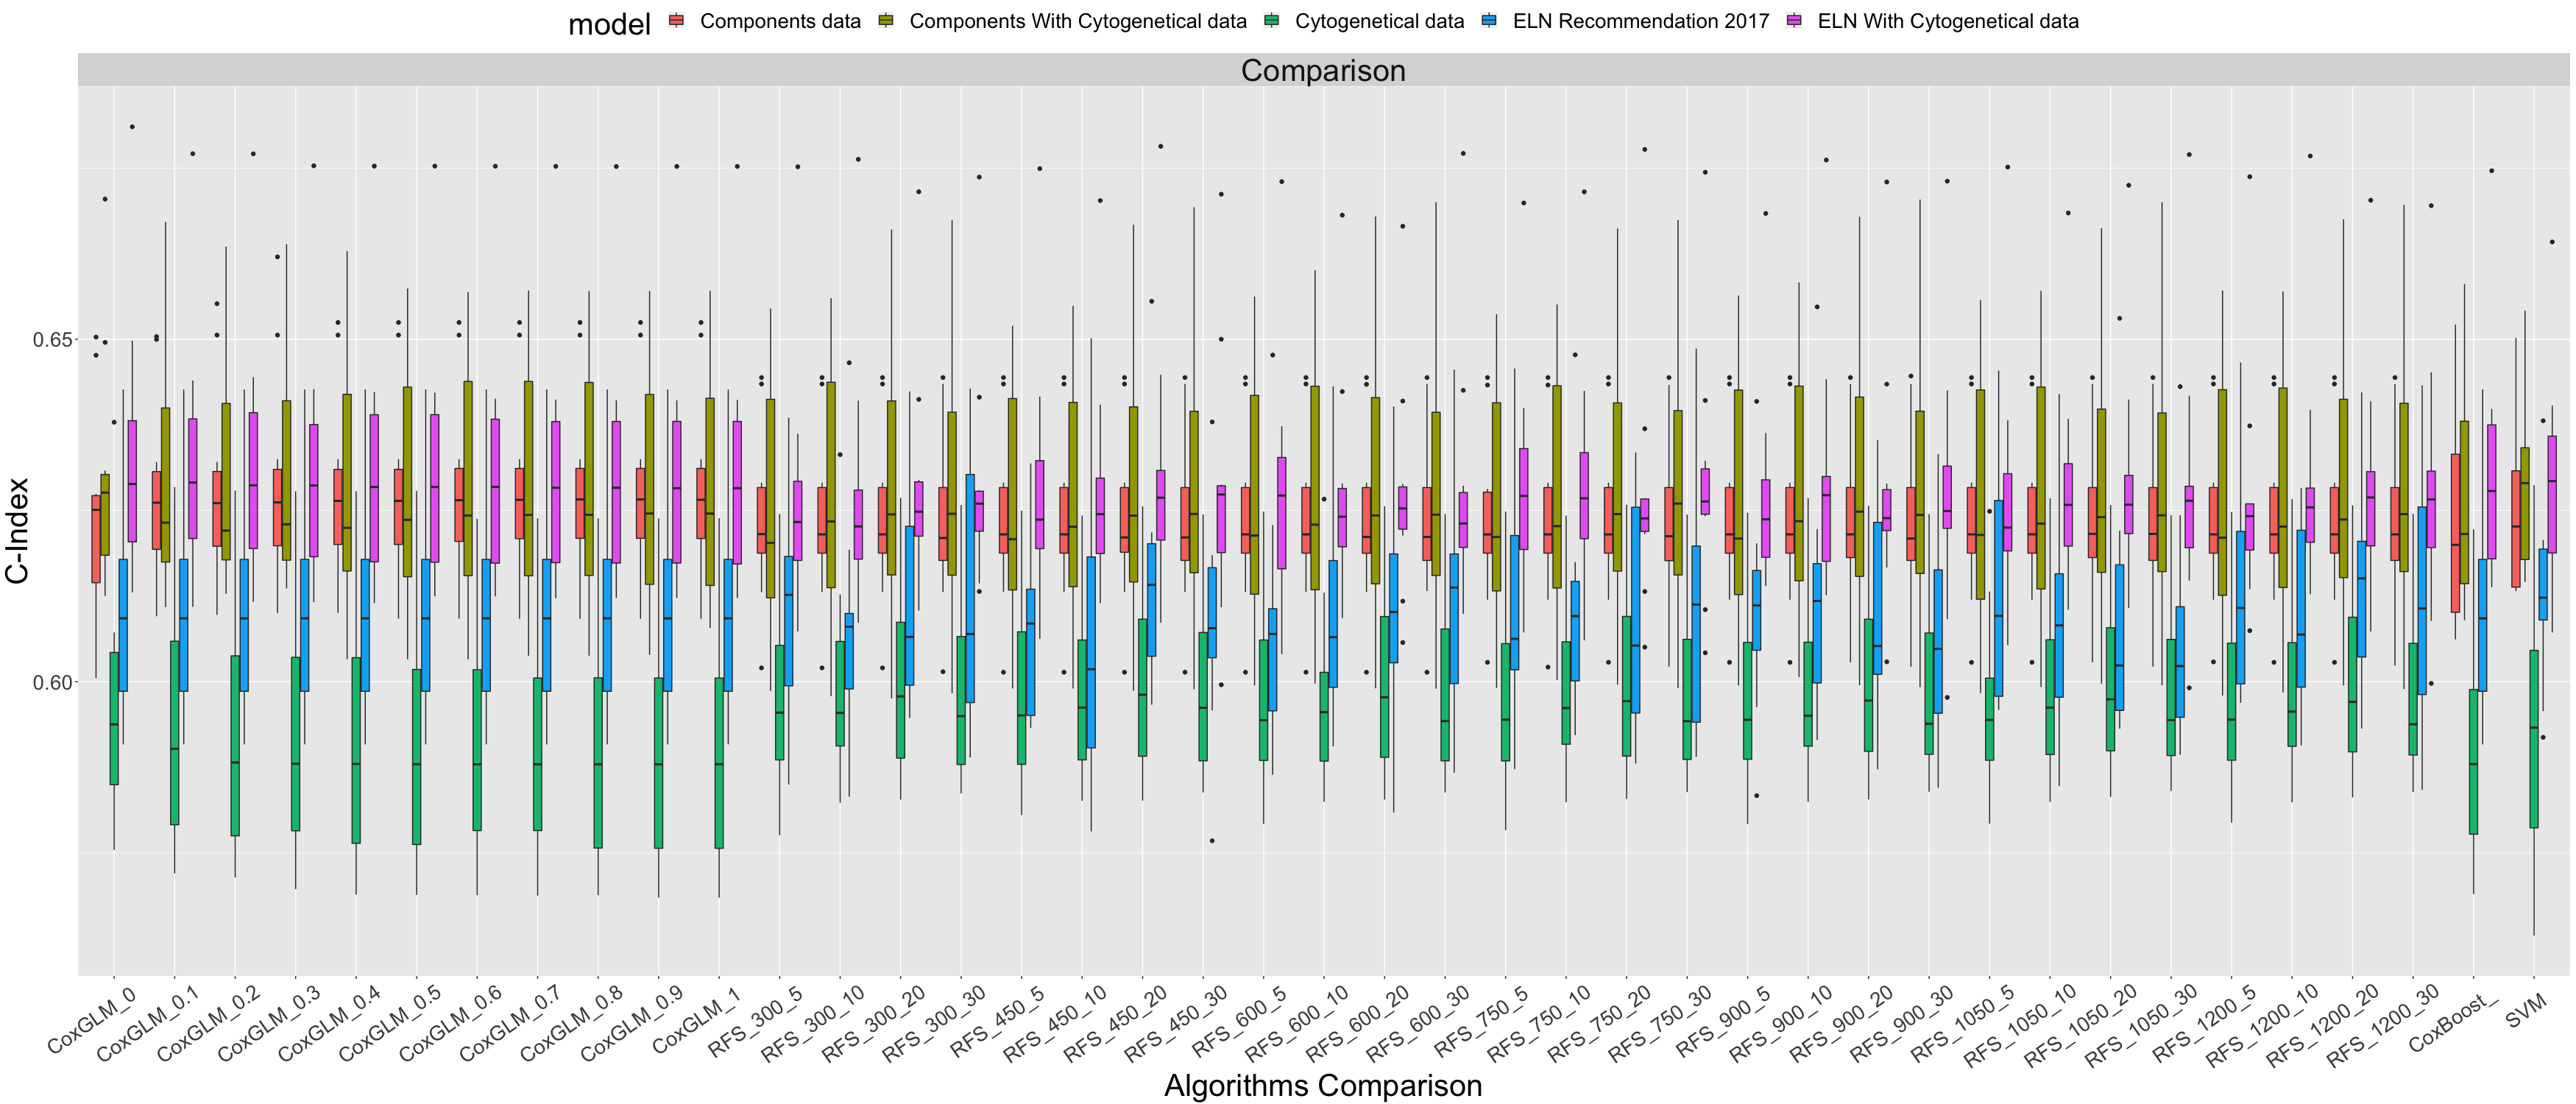

In [93]:
cyto_comp <- cbind(read.table("../InitialPrognosis/final_prognosis/cyto_comp.tsv"),SVM=SVM_final$cyto_comp)
cyto_comp$RFX_ <- NULL
cyto_comp $model <- "Components With Cytogenetical data"

comp <- cbind(read.table("../InitialPrognosis/final_prognosis/comp.tsv")[1:10,],SVM=SVM_final$comp[1:10])
comp$RFX_ <- NULL
comp$model <- "Components data"

eln <- cbind(read.table("../InitialPrognosis/final_prognosis/eln.tsv")[1:10,],SVM=SVM$eln[1:10])
eln$RFX_ <- NULL
eln$model <- "ELN Recommendation 2017"

cyto_eln <- cbind(read.table("../InitialPrognosis/final_prognosis/eln_cyto.tsv")[1:10,],SVM=SVM$eln_cyto[1:10])
cyto_eln$RFX_ <- NULL
cyto_eln$model <- "ELN With Cytogenetical data"

cyto<- cbind(read.table("../InitialPrognosis/final_prognosis/cyto.tsv")[1:10,],SVM=SVM_final$cyto[1:10])
cyto$RFX_ <- NULL
cyto$model <- "Cytogenetical data"

df_comparison <- rbind(cyto_comp,comp)
df_comparison <- rbind(df_comparison,eln)
df_comparison <- rbind(df_comparison,cyto_eln)
df_comparison <- rbind(df_comparison,cyto)
df_comparison <- melt(df_comparison,id='model')
df_comparison $title <- "Comparison"
set_notebook_plot_size(35,15)
mean(as.matrix(cyto_comp[,-length(colnames(cyto_comp))]))
mean(as.matrix(comp[,-length(colnames(comp))]))
mean(as.matrix(eln[,-length(colnames(eln))]))

ggplot(df_comparison,aes(x=variable,y=value)) + geom_boxplot(aes(fill = model), notch=F)+
theme(strip.text = element_text(size=30),legend.position="top",axis.text.x = element_text(angle = 35, hjust = 0.8,vjust=0.8,size=20),axis.text.y = element_text(size = 20),
     axis.title.x=element_text(size=30),axis.title.y=element_text(size=30),legend.title=element_text(size=30),legend.text=element_text(size=20)) +
ylab("C-Index") + xlab("Algorithms Comparison") + facet_wrap( ~ title) #+ stat_compare_means(paired = T)

## INTERESTING :
#### Adding Cytogenetical data to Components does not improve the C-I compared to when we add cytogenetical data to ELN. Also, there is clearly a motivation to add other features to cytogenetical data
Let's check that for genetical data:

# More insights with genetical data

0.6532671 0.6532671

[1] 0.6248873

[1] 0.6101422

[1] 0.6367702

[1] 0.6447529

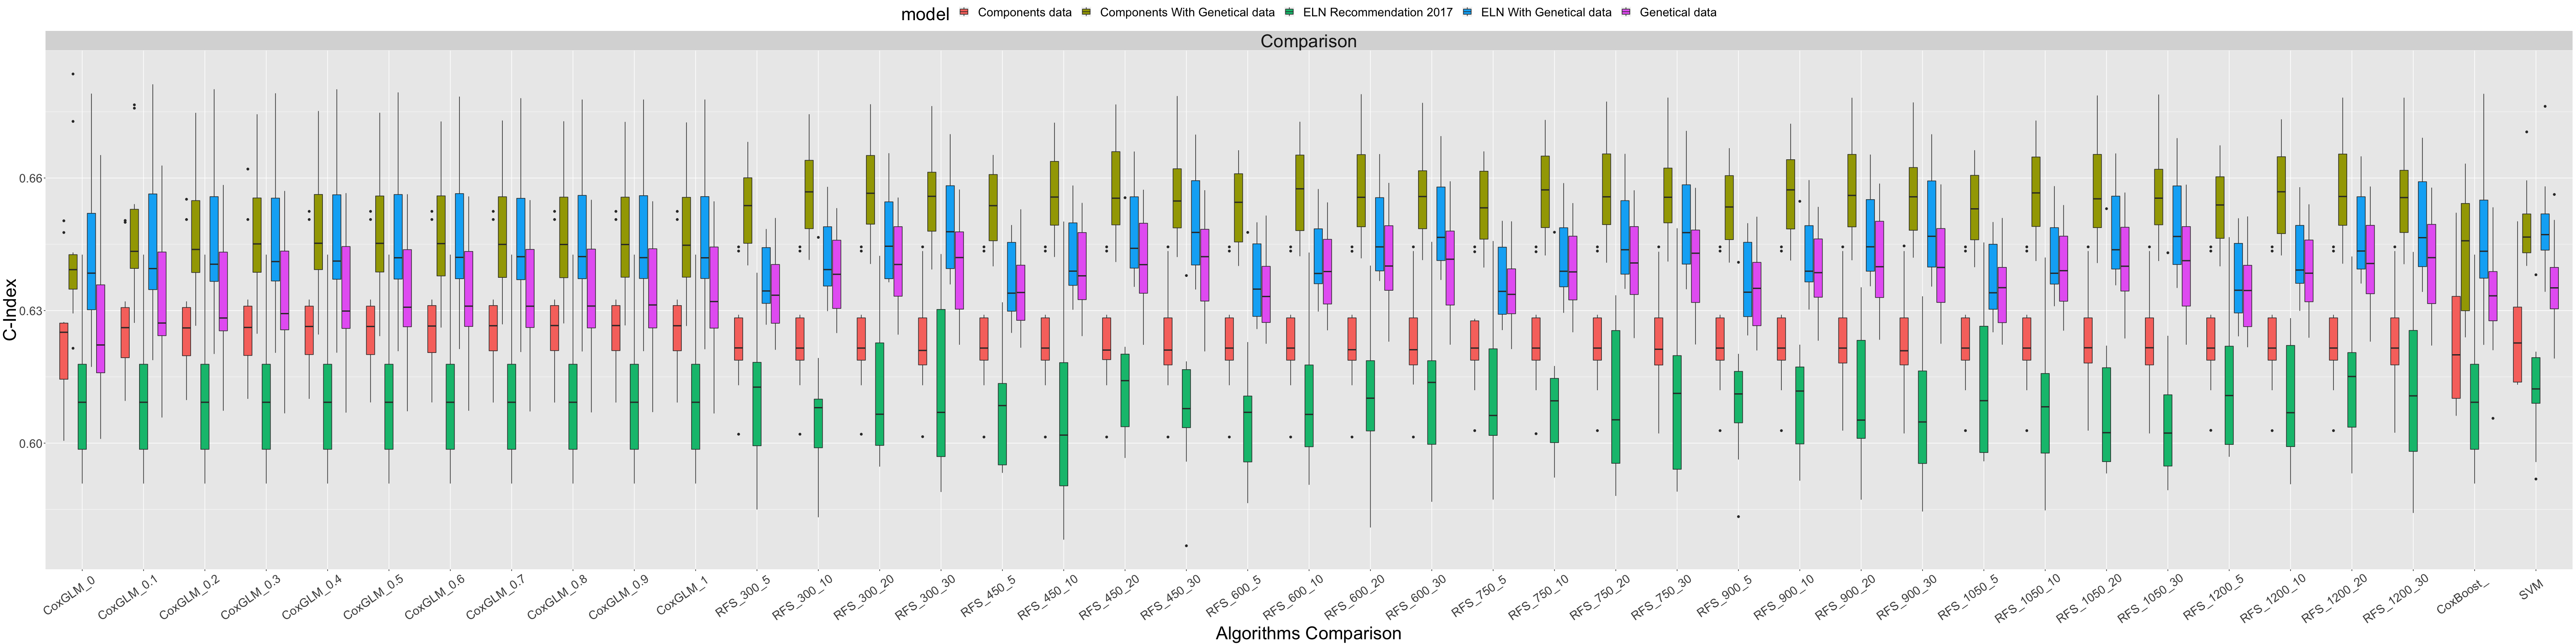

In [99]:
gen_comp <- cbind(read.table("../InitialPrognosis/final_prognosis/gen_comp.tsv"),SVM=SVM_final$gen_comp)
gen_comp$RFX_ <- NULL
gen_comp $model <- "Components With Genetical data"

comp <- cbind(read.table("../InitialPrognosis/final_prognosis/comp.tsv")[1:10,],SVM=SVM_final$comp[1:10])
comp$RFX_ <- NULL
comp$model <- "Components data"

eln <- cbind(read.table("../InitialPrognosis/final_prognosis/eln.tsv")[1:10,],SVM=SVM$eln[1:10])
eln$RFX_ <- NULL
eln$model <- "ELN Recommendation 2017"

gen_eln <- cbind(read.table("../InitialPrognosis/final_prognosis/eln_gen.tsv")[1:10,],SVM=SVM$eln_gen[1:10])
gen_eln$RFX_ <- NULL
gen_eln$model <- "ELN With Genetical data"

gen<- cbind(read.table("../InitialPrognosis/final_prognosis/gen.tsv")[1:10,],SVM=SVM_final$gen[1:10])
gen$RFX_ <- NULL
gen$model <- "Genetical data"

df_comparison <- rbind(gen_comp,comp)
df_comparison <- rbind(df_comparison,eln)
df_comparison <- rbind(df_comparison,gen_eln)
df_comparison <- rbind(df_comparison,gen)
df_comparison <- melt(df_comparison,id='model')
df_comparison $title <- "Comparison"
set_notebook_plot_size(60,15)
mean(as.matrix(comp[,-length(colnames(comp))]))
mean(as.matrix(eln[,-length(colnames(eln))]))
mean(as.matrix(gen[,-length(colnames(gen))]))
mean(as.matrix(gen_eln[,-length(colnames(gen_eln))]))
ggplot(df_comparison,aes(x=variable,y=value)) + geom_boxplot(aes(fill = model), notch=F)+
theme(strip.text = element_text(size=30),legend.position="top",axis.text.x = element_text(angle = 35, hjust = 0.8,vjust=0.8,size=20),axis.text.y = element_text(size = 20),
     axis.title.x=element_text(size=30),axis.title.y=element_text(size=30),legend.title=element_text(size=30),legend.text=element_text(size=20)) +
ylab("C-Index") + xlab("Algorithms Comparison") + facet_wrap( ~ title) #+ stat_compare_means(paired = T)